## SYDE 750 Assignment 1: Representation in Populations of Neurons

### By Tushar Chopra

* Due Date: January 28th at midnight
* Total marks: 20 (20% of final grade)
* Late penalty: 1 mark per day
* It is recommended that you use Python.
* Do not use or refer to any code from Nengo

## 1) Representation of Scalars

### 1.1) Basic encoding and decoding
Write a program that implements a neural representation of a scalar value  𝑥 . For the neuron model, use a rectified linear neuron model ( 𝑎=𝑚𝑎𝑥(𝐽,0) ). Choose the maximum firing rates randomly (uniformly distributed between 100Hz and 200Hz at x=1), and choose the x-intercepts randomly (uniformly distributed between -0.95 and 0.95). Use those values to compute the corresponding  𝛼  and  𝐽𝑏𝑖𝑎𝑠  parameters for each neuron. The encoders  𝑒  are randomly chosen and are either +1 or -1 for each neuron. Go through the following steps:

In [39]:
%pylab inline
import numpy as np

class RLNeuron:
    
    def __init__(self):
        
        self.max_firing_rate = np.random.uniform(low = 100, high = 200)
        self.x_intercept = np.random.uniform(low = -0.95,high = 0.95)
        self.encoder = np.random.choice([1,-1])
        
        self.alpha = self.max_firing_rate/(1-self.x_intercept)
        self.j_bias = -self.alpha * self.x_intercept
        
        self.rates = []
        
    def set_firing_rates(self, X):
        for x in X: 
            self.rates.append(max(self.encoder * self.alpha * x + self.j_bias, 0)) 

Populating the interactive namespace from numpy and matplotlib


a). [1 mark] Plot the neuron responses  𝑎𝑖  for 16 randomly generated neurons. (See Figure 2.4 in the book for an example, but with a different neuron model and a different range of maximum firing rates).
Since you can't compute this for every possible  𝑥  value between -1 and 1, sample the x-axis with  𝑑𝑥=0.05 . Use this sampling throughout this question)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


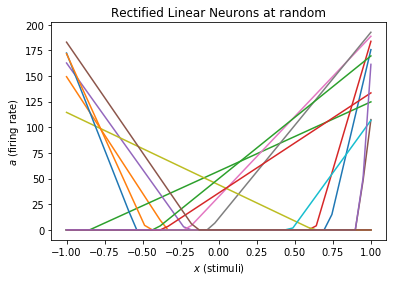

In [2]:
number_of_samples = (1-(-1))/0.05
number_of_neurons = 16
X = np.linspace(-1,1,number_of_samples)


def initialzeNeurons(number_of_neurons, X):
    neurons = []
    for i in range(number_of_neurons):
        neu = RLNeuron()
        neu.set_firing_rates(X)
        neurons.append(neu)
    return neurons

neurons = initialzeNeurons(number_of_neurons,X)

for neu in neurons:
    plot(X, neu.rates)
xlabel('$x$ (stimuli)')
ylabel('$a$ (firing rate)')
title('Rectified Linear Neurons at random');

b). [1 mark] Compute the optimal decoders  𝑑𝑖  for those 16 neurons (as shown in class). Report their values.
The easiest way to compute  𝑑  is to use the matrix notation mentioned in the course notes.  𝐴  is the matrix of neuron activities (the same thing used to generate the plot in 1.1a).

In [3]:
def decodeNeurons(neurons):
    only_neuron_rates = []
    for neu in neurons:
        only_neuron_rates.append(neu.rates)
    A = np.transpose(only_neuron_rates) # neuron activity matrix
    gamma = np.dot(np.transpose(A),A)/number_of_neurons
    upsilon = np.dot(np.transpose(A),X)/number_of_neurons
    d = np.dot(np.linalg.inv(gamma),upsilon)
    return A,d
A,d = decodeNeurons(neurons)
print("Decoders: ",d)

Decoders:  [-2.63276906e-05 -3.43526692e-05  3.53709585e-06  5.07214282e-04
 -2.90526148e-03  5.64100956e-06  4.56534174e-03  1.11834131e-04
 -3.53116567e-03  4.93171627e-05  4.93887924e-06 -1.48202019e-05
 -4.36099075e-05  2.23584187e-04 -2.25564664e-06 -6.35619551e-04]


c). [1 mark] Compute and plot  𝑥̂ =∑𝑖𝑑𝑖𝑎𝑖 . Overlay on the plot the line  𝑦=𝑥 . (See Figure 2.7 for an example). Make a separate plot of  𝑥−𝑥̂   to see what the error looks like. Report the Root Mean Squared Error value.

In [4]:
X_hat = np.dot(A,d)
def getRMS(X, X_hat):
    RMS = 0
    Diff = X - X_hat
    for x in range(0,len(X)):
        RMS += np.power(Diff[x],2)
    RMS = np.sqrt(RMS/len(X))
    return RMS, Diff

RMS1, Diff = getRMS(X, X_hat)
print("RMS error = ", str(RMS1))

RMS error =  0.0004099467467450503


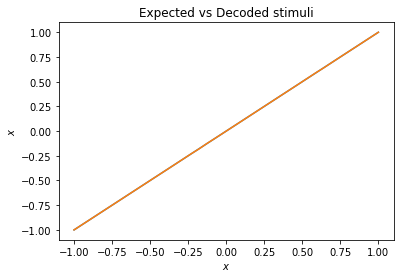

In [5]:
plot(X, X)
plot(X, X_hat)
xlabel('$x$')
ylabel('$x$')
title('Expected vs Decoded stimuli');


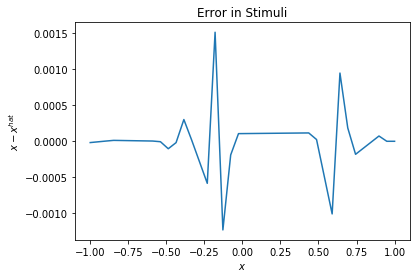

In [6]:
plot(X, Diff)
xlabel('$x$')
ylabel('$x - x^{hat}$')
title('Error in Stimuli');

d). [1 mark] Now try decoding under noise. Add random normally distributed noise to  𝑎  and decode again. The noise is a random variable with mean 0 and standard deviation of 0.2 times the maximum firing rate of all the neurons. Resample this variable for every different  𝑥  value for every different neuron. Create all the same plots as in part c). Report the Root Mean Squared Error value.

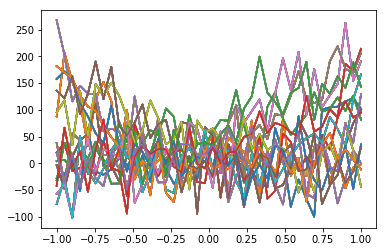

In [7]:
def generateNoise(A, scale):
    noise = np.random.normal(loc = 0, scale = scale * np.max(A), size = A.shape)
    return A + np.random.normal(loc = 0, scale = scale * np.max(A), size = A.shape)

Anoise = generateNoise(A, 0.2)
for i in range(0,number_of_neurons):
    plot(X, Anoise)

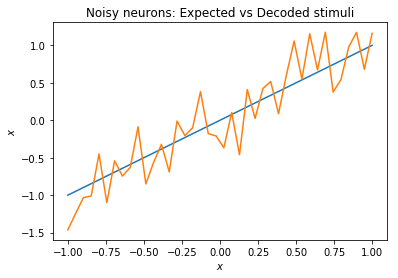

In [8]:
X_hat_noise = np.dot(Anoise,d)
plot(X, X)
plot(X, X_hat_noise)
xlabel('$x$')
ylabel('$x$')
title('Noisy neurons: Expected vs Decoded stimuli');

RMS error =  0.29710859231438697


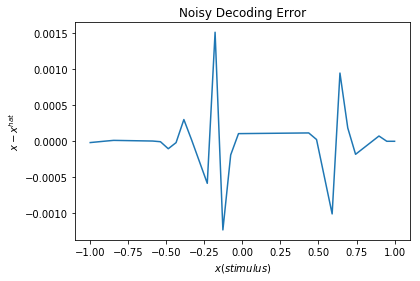

In [9]:
RMS2, Diff_noise = getRMS(X, X_hat_noise)
print("RMS error = ", str(float(RMS2)))
plot(X, Diff)
xlabel('$x (stimulus)$')
ylabel('$x - x^{hat}$')
title('Noisy Decoding Error');

e). [1 mark] Recompute the decoders  𝑑𝑖  taking noise into account (as shown in class). Show how these decoders behave when decoding both with and without noise added to  𝑎  by making the same plots as in c) and d). Report the RMSE for both cases.
As in the previous question,  𝜎  is 0.2 times the maximum firing rate of all the neurons.

In [10]:
def decodeWithNoise(A):
    upsilon = np.dot(np.transpose(A),X) / number_of_samples
    gamma = np.dot(np.transpose(A),A)/ number_of_samples
    var = np.power(0.2 * np.max(np.transpose(A)),2) * np.identity(np.transpose(A).shape[0])
    gamma+=var
    d_noise = np.dot(np.linalg.inv(gamma), upsilon)
    return d_noise

d_noise = decodeWithNoise(Anoise)
print("Decoded with noise:",d_noise)

Decoded with noise: [ 0.00037096 -0.00067449  0.0001033   0.00052169 -0.00110196 -0.00028235
  0.00100921  0.00119773 -0.00138054  0.00062075 -0.00086055 -0.00039998
  0.00095784  0.00057613  0.0002553  -0.00139881]


In [11]:
X_hat_noise = np.dot(Anoise,d_noise)

def getRMS(X, X_hat_noise):
    RMS = 0
    Diff = X - X_hat_noise
    for x in range(0,len(X)):
        RMS += np.power(Diff[x],2)
    RMS = np.sqrt(RMS/len(X))
    return RMS, Diff

RMS3, Diff_noise = getRMS(X, X_hat_noise)
print("RMS error = ", str(RMS3))

RMS error =  0.14236491333203985


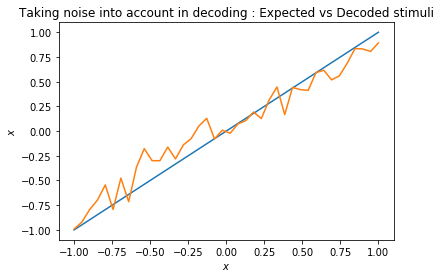

In [12]:
plot(X, X)
plot(X, X_hat_noise)
xlabel('$x$')
ylabel('$x$')
title('Taking noise into account in decoding : Expected vs Decoded stimuli');

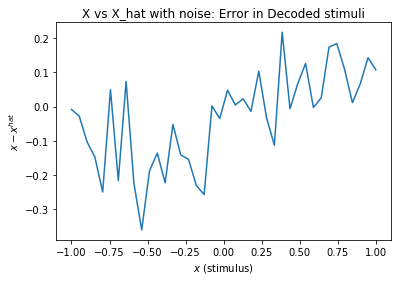

In [13]:
plot(X, Diff_noise)
xlabel('$x$ (stimulus)')
ylabel('$x - x^{hat}$')
title('X vs X_hat with noise: Error in Decoded stimuli');

RMS error =  0.12735914693340225


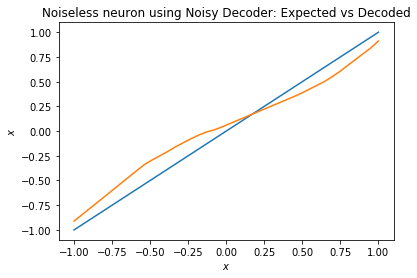

In [14]:
X_hat_clean = np.dot(A,d_noise)

RMS4, Diff_noise = getRMS(X, X_hat_clean)
print ("RMS error = ", str(float(RMS4)))

plot(X, X)
plot(X, X_hat_clean)
xlabel('$x$')
ylabel('$x$')
title('Noiseless neuron using Noisy Decoder: Expected vs Decoded');

f). [1 mark] Show a 2x2 table of the four RMSE values reported in parts c), d), and e). This should show the effects of adding noise and whether or not the decoders  𝑑  are computed taking noise into account. Write a few sentences commenting on what the table shows.

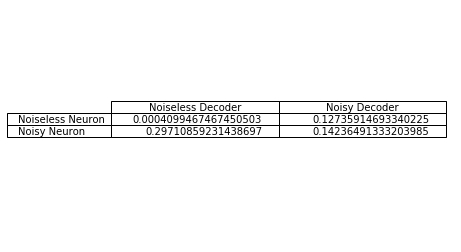

In [15]:
fig, axs =plt.subplots()
axs.axis('off')
row_labels = ['Noiseless Neuron', 'Noisy Neuron']
col_labels = ['Noiseless Decoder','Noisy Decoder']
table_vals = [[RMS1, RMS4],[RMS2, RMS3]]
the_table = axs.table(cellText=table_vals, rowLabels=row_labels, colLabels=col_labels,  loc='center', )

Comment
* The above table proves that RMS is lowest for the noiseless neurons.
* For Noisy neurons, noisy decoder is the best option as it take noise into account in decoding, which leads to low RMS error compare to noiseless decoder.
* When noiseless neuron decoded with decoder which takes noise into account(Noisy decoder), the RME error increase(expected behavior).

## 1.2 Started

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[2 marks] Plot the error due to distortion $E_{dist}$ and the error due to noise $E_{noise}$ as a function of $N$, the number of neurons. Use the equation with those two parts as your method (2.9 in the book). Generate two different loglog plots (one for each type of error) with $N$ values of [4, 8, 16, 32, 64, 128, 256, 512] (and more, if you would like).  For each $N$ value, do at least 5 runs and average the results.  For each run, different $\alpha$, $J^{bias}$, and $e$ values should be generated for each neuron.  Compute $d$ under noise, with $\sigma$ equal to 0.1 times the maximum firing rate.  Show visually that the errors are proportional to $1/N$ or $1/N^2$ (see figure 2.6 in the book).
</li>
</ol>

In [16]:
def getErrorSources(A):
    d = decodeWithNoise(A)
    X_hat = np.dot(A,d)
    Edist = 0.5 * np.sum((X - X_hat)**2)
    var = 0.2 * np.max(np.transpose(A))**2
    Enoise = var * np.sum(d**2)
    return Edist, Enoise
    
N = [4, 8, 16, 32, 64, 128, 256, 512]
error_distort = np.zeros(len(N))
error_noise = np.zeros(len(N))

for i,n in enumerate(N):
    e_d_array = []
    e_n_array = []
    for _ in range(5):
        
        neurons = initialzeNeurons(n,X)
        only_neuron_rates = []
        for neu in neurons:
            only_neuron_rates.append(neu.rates)
        A = np.transpose(only_neuron_rates) # neuron activity matrix
        
        Anoise = generateNoise(A, 0.1)
        e_d, e_n = getErrorSources(Anoise)
        e_d_array.append(e_d)
        e_n_array.append(e_n)
    error_distort[i] = np.mean(e_d_array)
    error_noise[i] = np.mean(e_n_array)
    
print ("Error due to distort:",error_distort)
print ("Error due to noise:",error_noise)

Error due to distort: [1.83641865e+00 9.15877969e-01 1.77767613e-01 6.16005283e-02
 2.03170396e-02 7.01466904e-03 1.66068196e-03 4.42095196e-04]
Error due to noise: [0.22452601 0.18681106 0.1292251  0.0642498  0.03646561 0.01847291
 0.00984713 0.00542955]


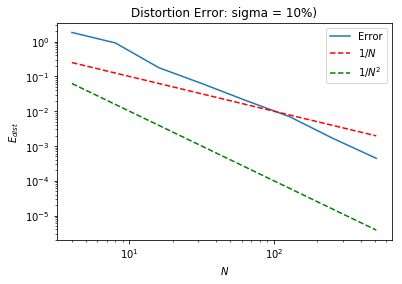

In [17]:
N_inv = [0] * len(N)
N_inv2 = [0] * len(N)
for i,m in enumerate(N):
    N_inv[i] = (m**(-1))
    N_inv2[i] = (m**(-2))

loglog(N, error_distort, label = "Error")
loglog(N,N_inv, 'r--', label="1/$N$")
loglog(N,N_inv2, 'g--', label="1/$N^2$")
plt.legend()
xlabel('$N$')
ylabel('$E_{dist}$')
title('Distortion Error: sigma = 10%)');

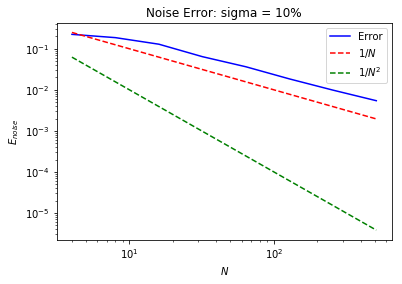

In [18]:
loglog(N, error_noise,'b', label="Error")
loglog(N,N_inv, 'r--', label="1/$N$")
loglog(N,N_inv2, 'g--', label="1/$N^2$")
plt.legend()
xlabel('$N$')
ylabel('$E_{noise}$')
title('Noise Error: sigma = 10%');

b). [1 mark] Repeat part a) with  𝜎  equal to 0.01 times the maximum firing rate.

In [19]:
error_distort2 = np.zeros(len(N))
error_noise2 = np.zeros(len(N))

for i,n in enumerate(N):
    e_d_array = []
    e_n_array = []
    for _ in range(5):
        neurons = initialzeNeurons(n,X)
        only_neuron_rates = []
        for neu in neurons:
            only_neuron_rates.append(neu.rates)
        A = np.transpose(only_neuron_rates) # neuron activity matrix
        
        Anoise = generateNoise(A,0.01)
        e_d, e_n = getErrorSources(Anoise)
        e_d_array.append(e_d)
        e_n_array.append(e_n)
    error_distort2[i] = np.mean(e_d)
    error_noise2[i] = np.mean(e_n)
print ("Error due to distort:",error_distort2)
print ("Error due to noise:",error_noise2)

Error due to distort: [5.81226563e-01 9.26491500e-02 3.88200227e-02 2.64384039e-02
 2.90188988e-03 8.80962623e-04 3.14826124e-04 7.28356361e-05]
Error due to noise: [0.30034437 0.15321251 0.08886478 0.06148915 0.02482147 0.01294117
 0.007388   0.00345466]


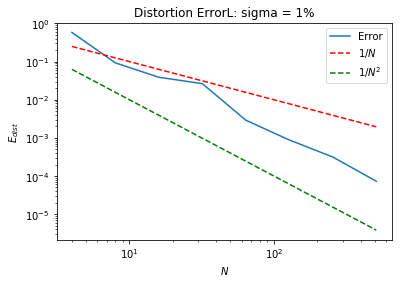

In [20]:
loglog(N, error_distort2, label = "Error")
loglog(N,N_inv, 'r--', label="1/$N$")
loglog(N,N_inv2, 'g--', label="1/$N^2$")
plt.legend()
xlabel('$N$')
ylabel('$E_{dist}$')
title('Distortion ErrorL: sigma = 1%');

c). [1 mark] What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?

* It shows the error due to noise outnumbers the error due to distortion when we increase the neuron population.

### 1.3) Leaky Integrate-and-Fire neurons

Change the code to use the LIF neuron model: 

$$
a_i = \begin{cases}
    {1 \over {\tau_{ref}-\tau_{RC}ln(1-{1 \over J})}} &\mbox{if } J>1 \\ 
    0 &\mbox{otherwise} 
    \end{cases}
$$


In [21]:
class LIFNeuron:
    
    def __init__(self, tau_ref, tau_rc):
        
        self.max_firing_rate = np.random.uniform(low = 100, high = 200)
        self.x_intercept = np.random.uniform(low = -0.95,high = 0.95)
        self.encoder = np.random.choice([1,-1])
        self.tau_ref = tau_ref
        self.tau_rc = tau_rc
        
        self.alpha = 1/(1+self.x_intercept) * 1/(1-np.exp((self.max_firing_rate*tau_ref - 1)/(self.max_firing_rate*tau_rc)))
        self.j_bias = self.alpha * self.x_intercept
        
        self.rates = []
        
    def set_firing_rates(self, X):
        for x in X: 
            j = self.encoder * self.alpha * x + self.j_bias
            self.rates.append((self.tau_ref - (self.tau_rc*np.log(1-j**(-1))))**(-1) if (j > 1) else 0)

1. [1 mark] Generate the same plot as 1.1a). Use  𝜏𝑟𝑒𝑓=0.002 s and  𝜏𝑅𝐶=0.02 s.

Note that you will need to compute new  𝛼  and  𝐽𝑏𝑖𝑎𝑠  values that will achieve the desired tuning curves (uniform distribution of x-intercepts between -1 and 1, and maximum firing rates between 100Hz and 200Hz). Since you know two points on the tuning curve (the x-intercept and the point where it hits maximum firing), this gives you 2 equations and 2 unknowns, so you can find  𝛼  and  𝐽𝑏𝑖𝑎𝑠  by substituting and rearranging.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


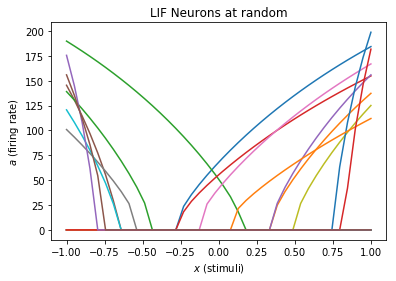

In [22]:
number_of_samples = (1-(-1))/0.05
number_of_neurons = 16
X = np.linspace(-1,1,number_of_samples)

def initialzeLIFNeurons(number_of_neurons, X):
    neurons = []
    for i in range(number_of_neurons):
        neu = LIFNeuron(0.002,0.02)
        neu.set_firing_rates(X)
        neurons.append(neu)
    return neurons

lif_neurons = initialzeLIFNeurons(number_of_neurons, X)

for neu in lif_neurons:
    plot(X, neu.rates)    
    
xlabel('$x$ (stimuli)')
ylabel('$a$ (firing rate)')
title('LIF Neurons at random');

2. [2 marks] Generate the same plots as 1.1e), and report the RMSE for both.

In [23]:
A_lif, d_lif = decodeNeurons(lif_neurons)
print("Decoders: ", str(d_lif))

Decoders:  [-1.05525992e-02  1.15835728e-02 -3.14167455e-03  1.61308905e-02
 -7.94933598e-03  1.19138830e-03 -6.16083802e-04  2.02424512e-04
  5.81094863e-04 -1.69619255e-03  1.24112768e-04  7.76364109e-04
 -2.47129944e-03  6.80975497e-05 -1.78177213e-04 -8.79802559e-05]


RMS error =  0.015668400730902532


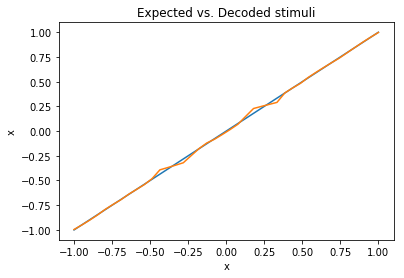

In [24]:
X_hat_lif = np.dot(A_lif, d_lif)

RMS1, diff = getRMS(X, X_hat_lif)
print("RMS error = ", str(RMS1))
plot(X, X)
plot(X, X_hat_lif)
xlabel('x')
ylabel('x')
title('Expected vs. Decoded stimuli');

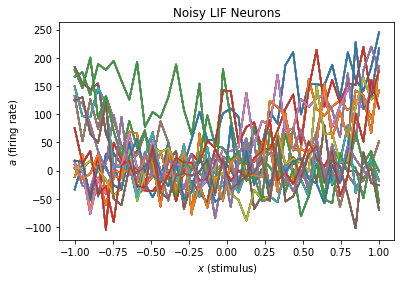

In [25]:
A_noise_lif = generateNoise(A_lif,0.2)

for i in range(len(lif_neurons)): #for each neuron
    plot(X, A_noise_lif)

xlabel('$x$ (stimulus)')
ylabel('$a$ (firing rate)')
title('Noisy LIF Neurons');

RMS error =  1.013554225624997


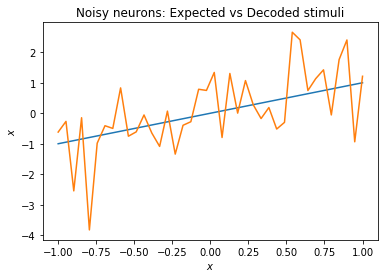

In [26]:
X_hat_noise_lif = np.dot(A_noise_lif,d_lif)

RMS2, diff = getRMS(X, X_hat_noise_lif)
print ("RMS error = ", str(RMS2))
plot(X, X)
plot(X, X_hat_noise_lif)
xlabel('$x$')
ylabel('$x$')
title('Noisy neurons: Expected vs Decoded stimuli');

RMS error =  0.14894920701055758


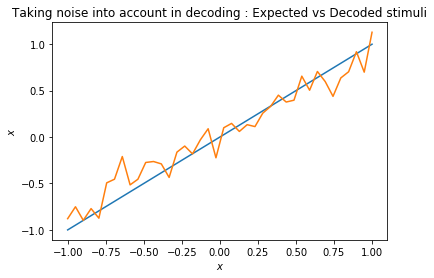

In [27]:
d_noise_lif = decodeWithNoise(A_noise_lif)
X_hat_noise_lif2 = np.matmul(A_noise_lif,d_noise_lif)

RMS3, Diff_noise = getRMS(X, X_hat_noise_lif2)
print ("RMS error = ", str(float(RMS3)))
plot(X, X)
plot(X, X_hat_noise_lif2)
xlabel('$x$')
ylabel('$x$')
title('Taking noise into account in decoding : Expected vs Decoded stimuli');

RMS error =  0.12305425949819924


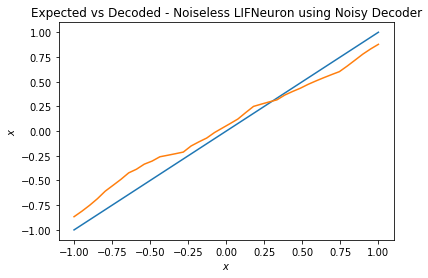

In [28]:
X_hat_clean_lif = np.dot(A_lif,d_noise_lif)

RMS4, Diff_noise = getRMS(X, X_hat_clean_lif)
print ("RMS error = ", str(float(RMS4)))

plot(X, X)
plot(X, X_hat_clean_lif)
xlabel('$x$')
ylabel('$x$')
title('Expected vs Decoded - Noiseless LIFNeuron using Noisy Decoder');

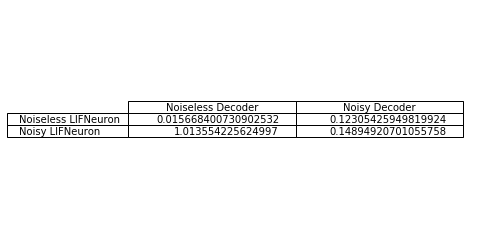

In [29]:
fig, axs =plt.subplots()
axs.axis('off')
row_labels = ['Noiseless LIFNeuron', 'Noisy LIFNeuron']
col_labels = ['Noiseless Decoder','Noisy Decoder']
table_vals = [[RMS1, RMS4],[RMS2, RMS3]]
the_table = axs.table(cellText=table_vals, rowLabels=row_labels, colLabels=col_labels,  loc='center', )

Comment
* The above table proves that RMS is lowest for the Noiseless LIFNeurons.
* For Noisy LIFNeurons, Noisy LIDDecoder is the best option as it take noise into account in decoding, which leads to low RMS error compare to Noiseless LIFDecoder.
* When Noiseless LIFNeuron decoded with decoder which takes noise into account(Noisy LIFDecoder), the RME error increase(expected behavior).

## 2) Representation of Vectors

a.[1 mark] Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of  𝜃=−𝜋/4 , has an x-intercept at the origin (0,0), and has a maximum firing rate of 100Hz.

* Remember that  𝐽=𝛼𝑒⋅𝑥+𝐽𝑏𝑖𝑎𝑠 , and both  𝑥  and  𝑒  are 2D vectors.
* This is a 3D plot similar to figure 2.8a in the book.
* In the scalar case (that you did in question 1.1a), the maximum firing rate occurred when  𝑥=1  for neurons with  𝑒=1  and at  𝑥=−1  for neurons with  𝑒=−1 . Of course, if the graph in 1.1a was extended to  𝑥>1  (or  𝑥<−1 ), neurons would start firing faster than their maximum firing rate. Similarly, here the "maximum firing rate" means the firing rate when  𝑥=𝑒 . This should allow you to reuse your code from 1.3a) to compute  𝛼  and  𝐽𝑏𝑖𝑎𝑠  for a desired maximum firing rate and x-intercept.

In [30]:
class LIF2DNeuron(object):
    
    def __init__(self, angle, tau_ref, tau_rc, max_rate, x_int):
        
        self.max_firing_rate = max_rate
        self.x_intercept = x_int
        self.encoder = [np.cos(angle), np.sin(angle)]
        self.tau_ref = tau_ref
        self.tau_rc = tau_rc

        self.alpha = 1/(1+np.linalg.norm(self.x_intercept)) * 1/(1-np.exp((self.max_firing_rate*tau_ref - 1)/(self.max_firing_rate*tau_rc)))
        self.j_bias = self.alpha *  np.linalg.norm(self.x_intercept)
        self.rates = []
        
    def set_firing_rates(self, V):
        self.rates = []
        for v in V: 
            j = self.alpha * np.vdot(v, self.encoder) + self.j_bias
            self.rates.append((self.tau_ref - (self.tau_rc*np.log(1-j**(-1))))**(-1) if (j > 1) else 0)

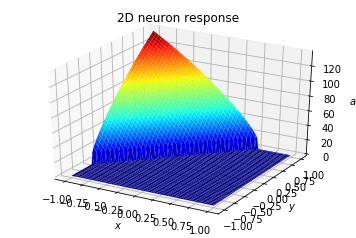

In [31]:
angle = -np.pi/4
number_of_samples = 100

X = np.linspace(-1,1,number_of_samples)
Y = np.linspace(-1,1,number_of_samples)
X,Y = numpy.meshgrid(X, Y)

points = []
for i in range(len(X)):
    for j in range(len(Y)):
        points.append([X[j][i],Y[j][i]])

lif_2d_neuron = LIF2DNeuron(angle,0.002,0.02, 100, np.matrix([0,0]))
lif_2d_neuron.set_firing_rates(points)
rates = lif_2d_neuron.rates
rates = np.array(rates).reshape(number_of_samples,number_of_samples)


from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, rates, cmap=pylab.cm.jet)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$a$")
ax.set_title("2D neuron response");

b). [1 mark] Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle. This will be similar to Figure 2.8b in the book. Fit a curve of the form  𝐴𝑐𝑜𝑠(𝐵𝜃+𝐶)+𝐷  to the tuning curve and plot it as well. What makes a cosine a good choice for this? Why does it differ from the ideal curve?

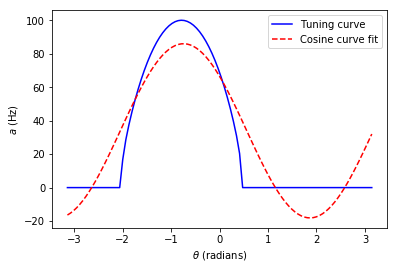

In [32]:
angles = np.linspace(-np.pi,np.pi,100)
X = numpy.array([numpy.sin(angles), numpy.cos(angles)])

points=[]
for angle in angles:
    point = [np.cos(angle), np.sin(angle)]
    points.append(point) 

neuron = LIF2DNeuron(-np.pi/4, 0.002, 0.02, 100, np.matrix([0,0]))
neuron.set_firing_rates(points)
rates = neuron.rates


def cosfunc(theta,a,b,c,d):
    return a*np.cos(b*theta + c) + d

from scipy.optimize import curve_fit
popt, pcov = curve_fit(cosfunc,angles,rates)

cosfit = []
for angle in angles:
    cosfit.append(cosfunc(angle,popt[0],popt[1],popt[2],popt[3])) 


figure()
xlabel(r'$\theta$ (radians)')
ylabel('$a$ (Hz)')
tune = plot(angles,rates,'b',label='Tuning curve')
cos = plot(angles,cosfit,'--r',label='Cosine curve fit')
legend(handles=[tune,cos],labels=[])
show()

i. What makes a cosine a good choice for this?
* Cosine curve is a good choice because it approximates bell-shaped tuning curves along a circular curve, which is sort of exponential function.

ii. Why does it differ from the ideal curve?
* Ideal cure is only acive in specific region else 0, where as cosine curve is continous with oscillating behavior.

### 2.2 Vector representation

a). [1 mark] Generate a set of 100 random unit vectors uniformly distributed around the unit circle. These will be the encoders  𝑒  for 100 neurons. Plot these vectors with a quiver or line plot (i.e. not just points, but lines/arrows to the points).

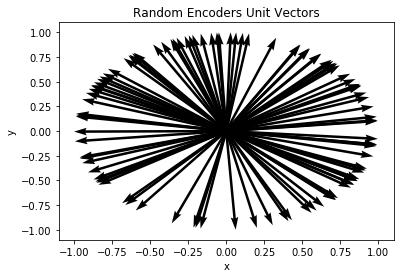

In [33]:
figure()
ax = plt.gca()
encoders = []
for _ in range(100):
    angle = np.random.uniform(0, 2*np.pi)
    ax.quiver(np.cos(angle),np.sin(angle),angles='xy',scale_units='xy',scale=1)
    unit = [np.cos(angle), np.sin(angle)]
    encoders.append(unit)

title('Random Encoders Unit Vectors')
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
xlabel('x')
ylabel('y')
show()


b). [1 mark] Compute the optimal decoders. Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with  𝜎  as 0.2 times the maximum firing rate. Plot the decoders. How do these decoding vectors compare to the encoding vectors?
* Note that the decoders will also be 2D vectors.
* In the scalar case, you used  𝑥  values between -1 and 1, with  𝑑𝑥=0.05 . In this case, you can regularly tile the 2D  𝑥  values ([1, 1], [1, 0.95], ... [-1, -0.95], [-1, 1]). Alternatively, you can just randomly choose 1600 different  𝑥  values to sample.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


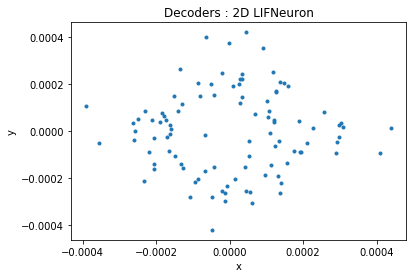

In [34]:
number_of_samples = (1-(-1))/0.05
X = np.linspace(-1,1,number_of_samples)
Y=np.linspace(-1,1,number_of_samples)
X,Y = np.meshgrid(X,Y)

V = []
for i in range(len(X)):
    for j in range(len(Y)):
        V.append([X[j][i],Y[j][i]])
        
angles = np.linspace(-np.pi,np.pi,100)


lif_2d_neurons = []
rates = []
for angle in angles:
    x_int = [np.cos(angle), np.sin(angle)]
    max_rate = np.random.uniform(100, 200)
    n = LIF2DNeuron(angle, 0.002, 0.02, max_rate, x_int)
    n.set_firing_rates(V)
    lif_2d_neurons.append(n)

only_neuron_rates = []
for neu in lif_2d_neurons:
    only_neuron_rates.append(neu.rates)
A = np.transpose(only_neuron_rates)

Anoise = generateNoise(A,0.2)


gamma_noisy = np.dot(np.transpose(Anoise),Anoise)/number_of_samples + 0.2*np.amax(A)*np.identity(A.shape[1])
upsilon = np.dot(np.transpose(Anoise),V)/number_of_samples
decoders = np.dot(np.linalg.inv(gamma_noisy),upsilon)

u,v = zip(*decoders)

figure()
title('Decoders : 2D LIFNeuron')
ax = plt.gca()
plot(u,v,'.')
xlabel('x')
ylabel('y')
show()


<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] Generate 20 random $x$ values over the unit circle (i.e. with different directions and radiuses).  For each $x$ value, determine the neural activity $a$ for each of the 100 neurons.  Now decode these values (i.e. compute $\hat{x}$) using the decoders from part b).  Plot the original and decoded values on the same graph in different colours, and compute the RMSE.
</li>
</ol>

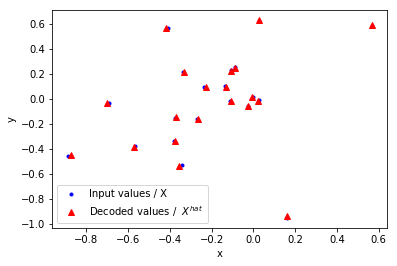

RMSE:  0.006328801102465437


In [35]:
X = []
for i in range(20):
    angle = np.random.uniform(0,2*np.pi)
    radius = np.random.uniform(0,1)
    X.append([radius*np.cos(angle), radius*np.sin(angle)])
    

rates = []
for n in lif_2d_neurons:
    n.set_firing_rates(X)
    rates.append(n.rates)    

A = np.transpose(rates)

gamma_noisy = np.dot(np.transpose(A),A)/number_of_samples + 0.2*np.amax(A)*np.identity(A.shape[1])
upsilon = np.dot(np.transpose(A),X)/number_of_samples
decoders = np.dot(np.linalg.inv(gamma_noisy),upsilon)


X_hat = np.dot(A, decoders)

u_A,v_A = zip(*X)
u_X_hat, v_X_hat = zip(*X_hat)

figure()
ax = plt.gca()
s = plot(u_A,v_A,'.b',label='Input values / X')
a = plot(u_X_hat,v_X_hat,'r^',label='Decoded values /  $X^{hat}$')
xlabel('x')
ylabel('y')
legend(handles=[s,a],labels=[])
show()


diffs = np.power(X - X_hat,2)
mean = np.mean([diff for diff in diffs])
rmse = np.sqrt(mean)

print('RMSE: ',rmse)

<ol style="list-style:lower-alpha outside none;" start="4">
<li> [2 marks] Repeat part c) but use the *encoders* as decoders.  This is what Georgopoulos used in his original approach to decoding information from populations of neurons.  Plot the decoded values this way and compute the RMSE.  In addition, recompute the RMSE in both cases, but ignoring the magnitude of the decoded vector.  What are the relative merits of these two approaches to decoding?
<ul><li>To ignore the magnitude of the vectors, normalize the length of the decoded vectors before computing the RMSE.</li>
</ul>
</li>
</ol>

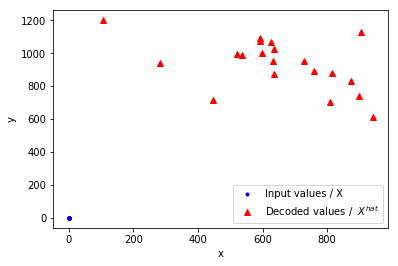

RMSE (Decoder as Encoder):  822.9154473469657
RMSE (ignoring the magnitude of the decoded vectors / normalizing vectors):  11.09105352546714


In [36]:
X_hat_encoders = np.dot(A, encoders)
u_X_hat_encoder, v_X_hat_encoder = zip(*X_hat_encoders)

figure()
ax = plt.gca()
s = plot(u_A,v_A,'.b',label='Input values / X')
a = plot(u_X_hat_encoder,v_X_hat_encoder,'r^',label='Decoded values /  $X^{hat}$')
xlabel('x')
ylabel('y')
legend(handles=[s,a],labels=[])
show()


diffs = np.power(X - X_hat_encoders,2)
mean = np.mean([diff for diff in diffs])
rmse = np.sqrt(mean)
print('RMSE (Decoder as Encoder): ',rmse)



X_norm = np.array([tmp/np.vdot(tmp,tmp) for tmp in X])
X_hat_norm = np.array([tmp/np.vdot(tmp,tmp) for tmp in X_hat_encoders])
diffs = np.power(X_norm - X_hat_norm,2)
mean = np.mean([diff for diff in diffs])
rmse_norm = np.sqrt(mean)
print('RMSE (ignoring the magnitude of the decoded vectors / normalizing vectors): ',rmse_norm)

Comment

* These plot shows, when we don't normalize the result, the error is much greater when we use encoders as decoders. But when we normalize the result, the RMSE is reduced significantly. Although using encoders as decoder has much low RMS error but it is still higher than the decoders itself.